In [ ]:
!pip install matplotlib seaborn


In [ ]:
# --- Import Required Libraries ---

# pandas: for loading and manipulating the dataset
import pandas as pd

# matplotlib: for creating plots and visualizations
import matplotlib.pyplot as plt

# seaborn: for statistical visualizations (heatmaps, boxplots, KDE plots, etc.)
import seaborn as sns


In [31]:

# Path to your CSV file
csv_path = 'data/raw/tasks_dataset.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Preview the first 10 rows
df.head(10)


,task_id,team,role,user_id,task_name,description,priority,expected_duration,completion_time
0,1,Engineering,Backend Engineer,64,ETL batch debugging,ETL batch debugging for engineering team by ba...,High,7,7.37
1,2,Operations,Operations Associate,69,Vendor follow-up,Vendor follow-up for operations team by operat...,Low,4,8.36
2,3,Marketing,SEO Specialist,143,Write blog post,Write blog post for marketing team by seo spec...,Low,8,12.64
3,4,Engineering,QA Engineer,198,ETL batch debugging,ETL batch debugging for engineering team by qa...,High,7,8.78
4,5,Engineering,QA Engineer,119,Write unit tests,Write unit tests for engineering team by qa en...,Low,4,2.84
5,6,Engineering,Frontend Engineer,57,Write frontend feature,Write frontend feature for engineering team by...,Low,1,0.50
6,7,Engineering,Data Engineer,88,Fix backend API bug,Fix backend API bug for engineering team by da...,High,7,7.10
7,8,Engineering,Data Engineer,27,Fix backend API bug,Fix backend API bug for engineering team by da...,High,1,2.26
8,9,Customer Support,Support Agent,14,Customer follow-up,Customer follow-up for customer support team b...,Low,4,4.77
9,10,Marketing,Content Writer,152,Write blog post,Write blog post for marketing team by content ...,Low,6,7.59


In [11]:
df.describe()


,task_id,user_id,expected_duration,completion_time
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,99.226200,4.483800,5.689888
std,1443.520003,57.730553,2.276834,3.654185
min,1.000000,1.000000,1.000000,0.500000
25%,1250.750000,49.000000,3.000000,2.730000
50%,2500.500000,99.000000,4.000000,5.460000
75%,3750.250000,149.000000,6.000000,8.320000
max,5000.000000,200.000000,8.000000,19.110000


In [32]:
# Fill missing completion_time with 0
df['completion_time'] = df['completion_time'].fillna(0)

# Optional: create a flag for completed tasks
df['completed'] = (df['completion_time'] > 0).astype(int)

# Check
print(df[['completion_time', 'completed']].head(10))


   completion_time  completed
0             7.37          1
1             8.36          1
2            12.64          1
3             8.78          1
4             2.84          1
5             0.50          1
6             7.10          1
7             2.26          1
8             4.77          1
9             7.59          1


In [ ]:
# Convert numeric identifiers to integers
df['task_id'] = df['task_id'].astype(int)
df['user_id'] = df['user_id'].astype(int)

# Convert duration columns to floats for accurate numerical analysis
df['expected_duration'] = df['expected_duration'].astype(float)
df['completion_time'] = df['completion_time'].astype(float)

# Convert categorical fields to 'category' dtype for efficiency and better analysis
df['priority'] = df['priority'].astype('category')
df['team'] = df['team'].astype('category')
df['role'] = df['role'].astype('category')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   task_id            5000 non-null   int64   
 1   team               5000 non-null   category
 2   role               5000 non-null   category
 3   user_id            5000 non-null   int64   
 4   task_name          5000 non-null   object  
 5   description        5000 non-null   object  
 6   priority           5000 non-null   category
 7   expected_duration  5000 non-null   float64 
 8   completion_time    5000 non-null   float64 
 9   completed          5000 non-null   int64   
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 289.2+ KB


### Which teams have the highest number of tasks assigned?

The bar chart below shows the distribution of tasks across all teams.


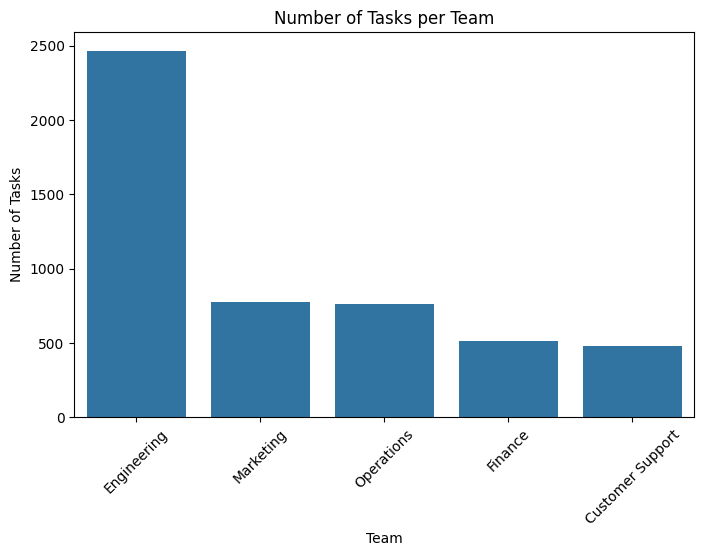

In [ ]:
# Plot count of tasks assigned to each team
plt.figure(figsize=(8,5))

# Countplot sorted by highest → lowest task counts using value_counts()
sns.countplot(data=df, 
              x='team', 
              order=df['team'].value_counts().index)

# Add title and axis labels
plt.title("Number of Tasks per Team")
plt.ylabel("Number of Tasks")
plt.xlabel("Team")

# Rotate team labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


### Insight  
The chart shows that **Engineering** has the highest number of tasks, while **Finance** and **Customer Support** have the lowest.  
This means the workload is not evenly distributed across teams.

### Why this matters for the project  
Uneven workload affects productivity.  
Teams with too many tasks struggle to meet deadlines, while others are underused.  
Understanding this imbalance helps justify why a task prediction system is useful for planning and resource management.

### ML Implication  
Because some teams have more data, the model will learn their patterns more accurately.  
Teams with fewer tasks may produce weaker predictions unless the imbalance is handled during modeling.

---

### Which roles are handling the most tasks?

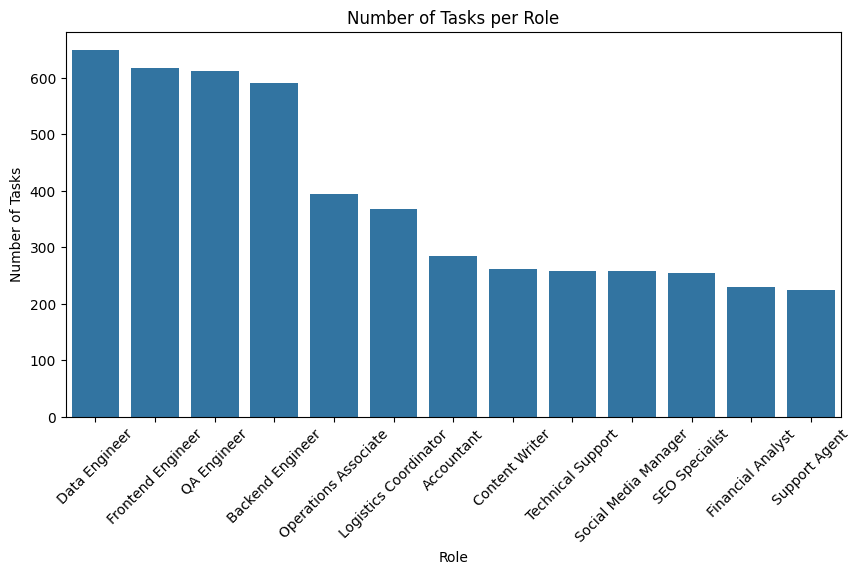

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='role', order=df['role'].value_counts().index)
plt.title("Number of Tasks per Role")
plt.ylabel("Number of Tasks")
plt.xlabel("Role")
plt.xticks(rotation=45)
plt.show()


### Insight  
The chart shows that **Data Engineers**, **Frontend Engineers**, and **QA Engineers** have the highest number of tasks, while roles like **Support Agent**, **Financial Analyst**, and **SEO Specialist** have the lowest.  
This indicates a significant workload imbalance across roles.

### Why this matters for the project  
Uneven task distribution can lead to burnout in high-load roles and underutilization in others.  
It may also reflect organizational priorities or gaps in task assignment logic.  
Recognizing this imbalance supports the case for a smarter task allocation system that adapts to role capacity and specialization.

### ML Implication  
Roles with more task data will yield stronger predictive models.  
Low-volume roles may require data augmentation or transfer learning to improve prediction quality.  
Balancing the dataset or applying role-specific modeling strategies will be key to fairness and accuracy.


----

### What is the distribution of task priorities?

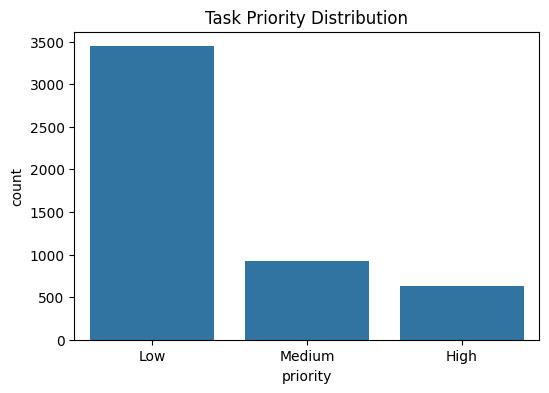

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='priority', order=['Low','Medium','High'])
plt.title("Task Priority Distribution")
plt.show()


### Insight  
The chart shows that **Low priority** tasks dominate the dataset, with nearly 3,500 entries.  
**Medium priority** tasks are significantly fewer, and **High priority** tasks are the least represented, just over 500.  
This indicates a strong skew toward non-urgent task labeling.

### Why this matters for the project  
An imbalanced priority distribution can lead to misaligned resource planning and delayed attention to critical work.  
If most tasks are marked as low priority, teams may overlook urgent issues or fail to escalate appropriately.  
Understanding this skew supports the need for a system that can intelligently assess and assign task priority.

### ML Implication  
The model will be biased toward predicting low priority unless the imbalance is addressed.  
Techniques like **class weighting**, **resampling**, or **priority-aware loss functions** will be important.  
Feature engineering that captures urgency signals beyond the raw label will improve model robustness and fairness.

----


### How does task priority affect the accuracy of duration estimates?

/var/folders/19/655s5m1n6yv9rbstc6jbgx600000gn/T/ipykernel_11125/3846803996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='priority', y='duration_error', palette="Set2")


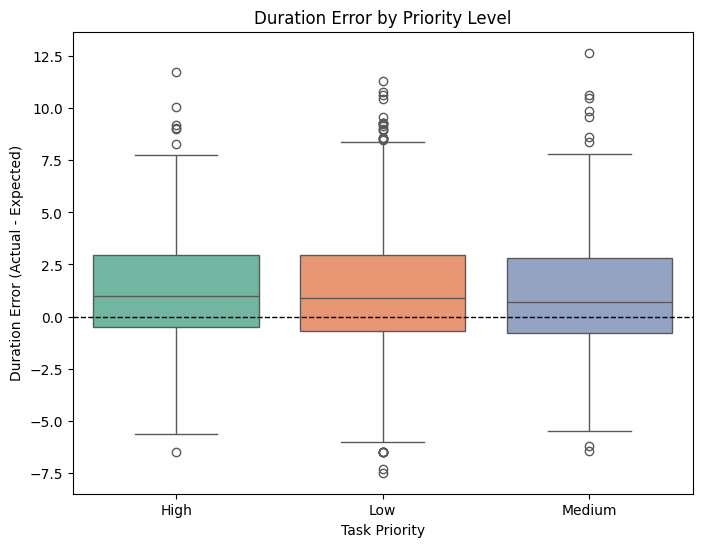

In [39]:
df['duration_error'] = df['completion_time'] - df['expected_duration']
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='priority', y='duration_error', palette="Set2")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # perfect estimation line
plt.title("Duration Error by Priority Level")
plt.xlabel("Task Priority")
plt.ylabel("Duration Error (Actual - Expected)")
plt.show()

### Insight  
The chart shows that **duration errors** (Actual - Expected) are slightly positive across all priority levels, meaning tasks generally take longer than expected.  
**High priority** tasks have the widest spread of errors, with more extreme outliers, while **Low** and **Medium priority** tasks show tighter distributions.  
This suggests that urgent tasks are harder to estimate accurately and may be more volatile.

### Why this matters for the project  
Inaccurate duration estimates can disrupt planning and resource allocation, especially for high-priority tasks.  
If urgent tasks consistently exceed expectations, teams may miss deadlines or misallocate effort.  
Understanding how priority affects estimation accuracy helps justify the need for a predictive model that adjusts expectations based on task context.

### ML Implication  
The model should account for **priority level** when predicting task duration.  
High-priority tasks may require **larger uncertainty bounds** or **custom error handling**.  
Incorporating priority as a feature and analyzing its interaction with other variables will improve model reliability and planning accuracy.

---

### Do different teams complete tasks at different speeds, and what does that reveal about efficiency or bottlenecks?

/var/folders/19/655s5m1n6yv9rbstc6jbgx600000gn/T/ipykernel_11125/2901359467.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_avg = df.groupby('team')['completion_time'].mean().sort_values(ascending=False)


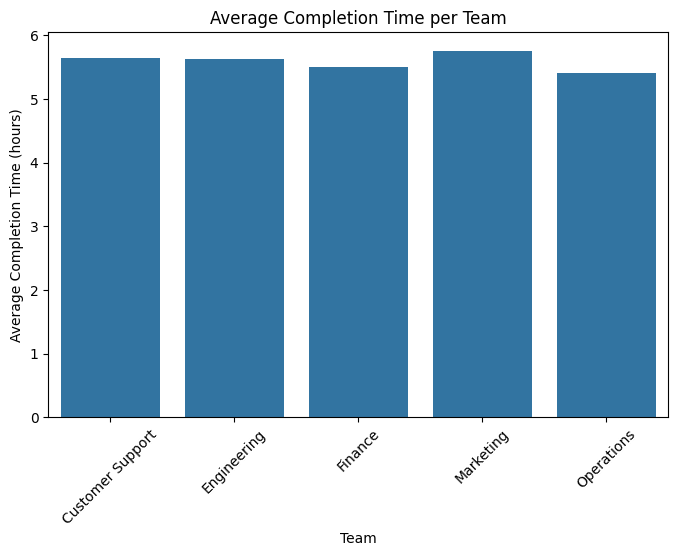

In [40]:
plt.figure(figsize=(8,5))
team_avg = df.groupby('team')['completion_time'].mean().sort_values(ascending=False)
sns.barplot(x=team_avg.index, y=team_avg.values)
plt.title("Average Completion Time per Team")
plt.ylabel("Average Completion Time (hours)")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


### Insight  
The chart shows that all teams—**Customer Support**, **Engineering**, **Finance**, **Marketing**, and **Operations**—have an average task completion time close to **5.5 hours**.  
Despite differences in task volume, completion speed appears consistent across teams, with only slight variation.

### Why this matters for the project  
This consistency suggests that teams may be operating under similar constraints or expectations, regardless of workload.  
It also implies that **completion time alone may not reveal bottlenecks**—you’ll need to combine it with task volume, priority, and error metrics to understand true efficiency.  
This insight supports the case for a more nuanced task prediction system that accounts for team context.

### ML Implication  
Since completion time is relatively stable across teams, it may not be a strong standalone feature for modeling.  
However, combining it with **task priority**, **role**, and **duration error** could reveal deeper patterns.  
Feature interactions and residual analysis will be key to improving prediction accuracy and uncovering hidden inefficiencies.


---

### How does Piority Affects Completion time?

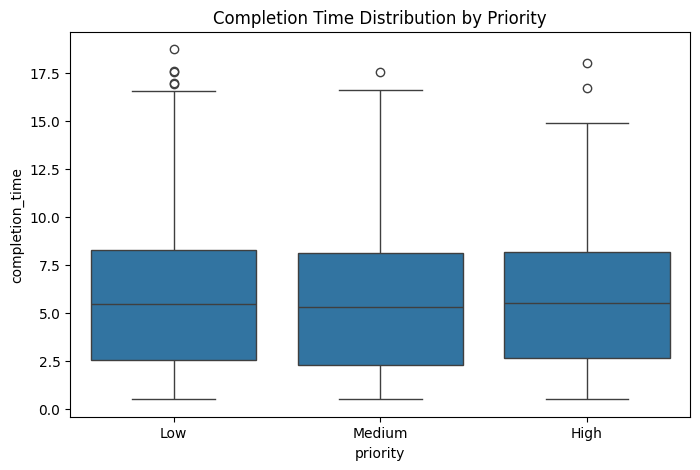

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='priority', y='completion_time', order=['Low','Medium','High'])
plt.title("Completion Time Distribution by Priority")
plt.show()


### Insight  
The chart shows that tasks across all priority levels—**Low**, **Medium**, and **High**—have similar median completion times, around **5 hours**.  
However, **Low and High priority tasks** display more outliers, indicating greater variability and unpredictability in how long they take to complete.

### Why this matters for the project  
This suggests that **priority labels may not strongly influence actual task speed**, which could point to inconsistent prioritization or poor alignment between urgency and execution.  
It also highlights that **some low-priority tasks are being delayed**, while **some high-priority tasks are rushed or misestimated**, creating volatility in planning.  
Understanding this pattern supports the need for a smarter system that predicts task duration with context-aware features.

### ML Implication  
Priority should be included as a feature, but not assumed to be a strong predictor of speed.  
The model may need to account for **priority volatility**, possibly using **uncertainty bounds** or **priority-context interactions**.  
Outlier handling and robust regression techniques will be important to avoid skewed predictions and improve reliability.
